In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) 
from sklearn import preprocessing
import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('sample.csv', sep=',')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-12-07,WN,WN,WN,3263,WN,N211WN,3263,12896,LBB,"Lubbock, TX",11259,DAL,"Dallas, TX",1550,1545.0,-5.0,10.0,1555.0,1644.0,4.0,1655,1648.0,-7.0,0.0,NaN,0.0,N,65.0,63.0,49.0,1.0,293.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-04-06,AA,AA,AA,2514,AA,N883NN,2514,12478,JFK,"New York, NY",10423,AUS,"Austin, TX",835,829.0,-6.0,20.0,849.0,1138.0,60.0,1153,1238.0,45.0,0.0,NaN,0.0,N,258.0,309.0,229.0,1.0,1521.0,0.0,0.0,45.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2019-07-12,AS,AS,AS,19,AS,N297AK,19,13204,MCO,"Orlando, FL",14747,SEA,"Seattle, WA",1925,1918.0,-7.0,21.0,1939.0,2223.0,5.0,2235,2228.0,-7.0,0.0,NaN,0.0,N,370.0,370.0,344.0,1.0,2554.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-08-23,DL,DL,DL,884,DL,N341DN,884,13487,MSP,"Minneapolis, MN",14679,SAN,"San Diego, CA",1802,1821.0,19.0,19.0,1840.0,1951.0,5.0,1948,1956.0,8.0,0.0,NaN,0.0,N,226.0,215.0,191.0,1.0,1532.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-26,DL,DL,DL,3057,DL,N123DQ,3057,14908,SNA,"Santa Ana, CA",14869,SLC,"Salt Lake City, UT",1315,1312.0,-3.0,10.0,1322.0,1556.0,6.0,1603,1602.0,-1.0,0.0,NaN,0.0,N,108.0,110.0,94.0,1.0,588.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#df['cancelled'].value_counts()
#df[df['cancelled']==1].head
df.shape

(10000, 42)

In [4]:
# select cols to keep
df1 = df.drop(columns=['branded_code_share', 'mkt_carrier', 'op_unique_carrier', 'op_carrier_fl_num', \
                       'origin_airport_id', 'origin_city_name', 'dest_airport_id', 'dest_city_name', 'tail_num', \
                       'dup', 'diverted', 'cancellation_code', 'no_name', 'first_dep_time', 'total_add_gtime', \
                       'longest_add_gtime', 'cancelled'])

In [7]:
IQR = (df1['arr_delay'].quantile(0.75)-df1['arr_delay'].quantile(0.25))
lower_outlier = df1['arr_delay'].quantile(0.25) - 1.5*IQR
upper_outlier = df1['arr_delay'].quantile(0.75) + 1.5*IQR
print(lower_outlier, upper_outlier)

-49.5 42.5


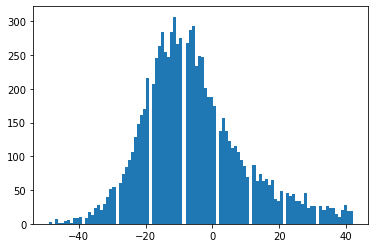

In [8]:
# get rid of outliers
df1 = df1[(df['arr_delay'] < upper_outlier) & (df1['arr_delay'] > lower_outlier)]
plt.hist(df1['arr_delay'], bins=100);

In [9]:
df1.isnull().sum()

fl_date                   0
mkt_unique_carrier        0
mkt_carrier_fl_num        0
origin                    0
dest                      0
crs_dep_time              0
dep_time                  0
dep_delay                 5
taxi_out                  5
wheels_off                5
wheels_on                 5
taxi_in                   5
crs_arr_time              0
arr_time                  0
arr_delay                 0
crs_elapsed_time          0
actual_elapsed_time       0
air_time                  5
flights                   0
distance                  0
carrier_delay          7917
weather_delay          7917
nas_delay              7917
security_delay         7917
late_aircraft_delay    7917
dtype: int64

In [10]:
weather = df1[df1['weather_delay'].notnull()]
weather = weather[weather['weather_delay']>0]
weather.shape

(33, 25)

<AxesSubplot:xlabel='origin', ylabel='weather_delay'>

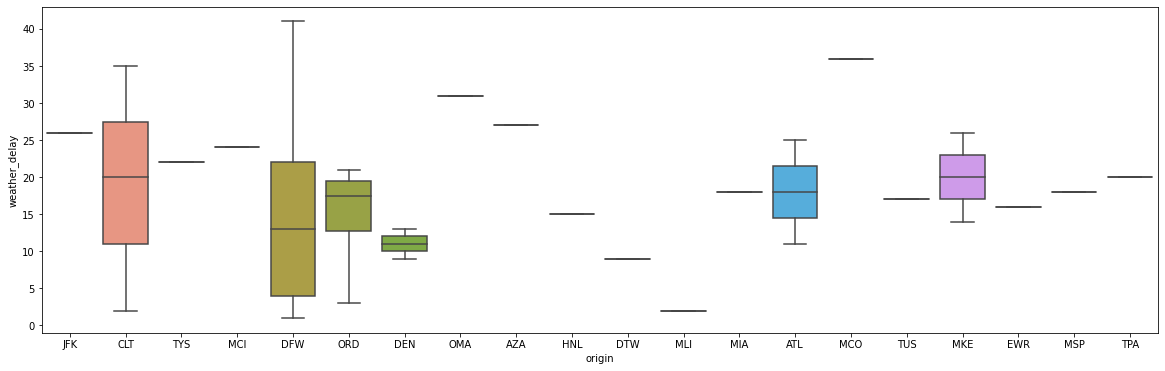

In [11]:
fix = plt.subplots(figsize=(20,6))
sns.boxplot(x='origin', y='weather_delay', data=weather)

In [12]:
carrier_delay = df1[df1['carrier_delay'].notnull()]
carrier_delay = carrier_delay[carrier_delay['carrier_delay']>0]
carrier_delay.shape

(457, 25)

<AxesSubplot:xlabel='origin', ylabel='carrier_delay'>

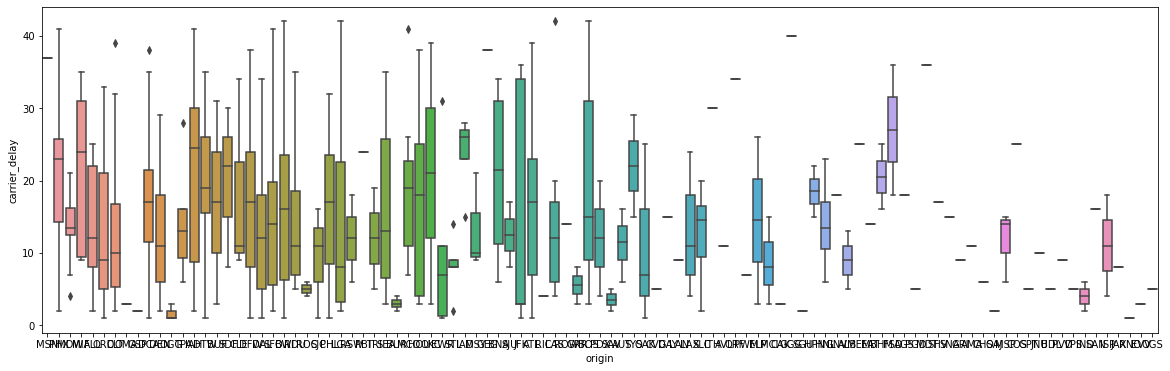

In [13]:
fix = plt.subplots(figsize=(20,6))
sns.boxplot(x='origin', y='carrier_delay', data=carrier_delay)

ugh

In [15]:
df1.head()

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-12-07,WN,3263,LBB,DAL,1550,1545.0,-5.0,10.0,1555.0,1644.0,4.0,1655,1648.0,-7.0,65.0,63.0,49.0,1.0,293.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12,AS,19,MCO,SEA,1925,1918.0,-7.0,21.0,1939.0,2223.0,5.0,2235,2228.0,-7.0,370.0,370.0,344.0,1.0,2554.0,NaN,NaN,NaN,NaN,NaN
3,2019-08-23,DL,884,MSP,SAN,1802,1821.0,19.0,19.0,1840.0,1951.0,5.0,1948,1956.0,8.0,226.0,215.0,191.0,1.0,1532.0,NaN,NaN,NaN,NaN,NaN
4,2019-11-26,DL,3057,SNA,SLC,1315,1312.0,-3.0,10.0,1322.0,1556.0,6.0,1603,1602.0,-1.0,108.0,110.0,94.0,1.0,588.0,NaN,NaN,NaN,NaN,NaN
5,2019-11-08,AS,3451,FAT,SAN,1150,1140.0,-10.0,24.0,1204.0,1303.0,3.0,1304,1306.0,2.0,74.0,86.0,59.0,1.0,314.0,NaN,NaN,NaN,NaN,NaN


In [16]:
df1['dest'].value_counts()

ATL    480
ORD    436
DEN    325
DFW    319
LAX    286
      ... 
CRP      1
CDC      1
GCK      1
FLO      1
ABY      1
Name: dest, Length: 306, dtype: int64

In [17]:
# change flight date to datetime
df1['fl_date'] = pd.to_datetime(df1['fl_date'])
#df1.dtypes

In [18]:
# create year, month, day, dayofweek columns
df1['year'] = df1['fl_date'].dt.year
df1['month'] = df1['fl_date'].dt.month
df1['day'] = df1['fl_date'].dt.day
df1['dayofweek'] = df1['fl_date'].dt.dayofweek

In [19]:
df1['dep_time'].isnull().sum()
df1['arr_time'].isnull().sum()

0

In [20]:
df1 = df1.dropna(axis=0, subset=['dep_time', 'arr_time'])

In [21]:
#df1['dep_time'] = df1['dep_time'].astype(int)
#df1['arr_time'] = df1['arr_time'].astype(int)
#df1['dep_time'] = df1['dep_time'].astype(str)
#df1['arr_time'] = df1['arr_time'].astype(str)

In [22]:
df1['crs_dep_time'] = df1['crs_dep_time'].astype(int)
df1['crs_arr_time'] = df1['crs_arr_time'].astype(int)
df1['crs_dep_time'] = df1['crs_dep_time'].astype(str)
df1['crs_arr_time'] = df1['crs_arr_time'].astype(str)

In [23]:
# create departure hour and arrival hour columns
#df1['dep_time'] = df1['dep_time'].apply(lambda x: str(x).zfill(4))
#df1['arr_time'] = df1['arr_time'].apply(lambda x: str(x).zfill(4))
#df1['dep_h'] = df1['dep_time'].str[0:2]
#df1['arr_h'] = df1['arr_time'].str[0:2]
#df1['dep_h'] = df1['dep_h'].replace('24', '00')
#df1['arr_h'] = df1['arr_h'].replace('24', '00')

In [24]:
# create departure hour and arrival hour columns
df1['crs_dep_time'] = df1['crs_dep_time'].apply(lambda x: str(x).zfill(4))
df1['crs_arr_time'] = df1['crs_arr_time'].apply(lambda x: str(x).zfill(4))
df1['dep_h'] = df1['crs_dep_time'].str[0:2]
df1['arr_h'] = df1['crs_arr_time'].str[0:2]
df1['dep_h'] = df1['dep_h'].replace('24', '00')
df1['arr_h'] = df1['arr_h'].replace('24', '00')

In [25]:
df1.head()

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day,dayofweek,dep_h,arr_h
0,2019-12-07,WN,3263,LBB,DAL,1550,1545.0,-5.0,10.0,1555.0,1644.0,4.0,1655,1648.0,-7.0,65.0,63.0,49.0,1.0,293.0,NaN,NaN,NaN,NaN,NaN,2019,12,7,5,15,16
2,2019-07-12,AS,19,MCO,SEA,1925,1918.0,-7.0,21.0,1939.0,2223.0,5.0,2235,2228.0,-7.0,370.0,370.0,344.0,1.0,2554.0,NaN,NaN,NaN,NaN,NaN,2019,7,12,4,19,22
3,2019-08-23,DL,884,MSP,SAN,1802,1821.0,19.0,19.0,1840.0,1951.0,5.0,1948,1956.0,8.0,226.0,215.0,191.0,1.0,1532.0,NaN,NaN,NaN,NaN,NaN,2019,8,23,4,18,19
4,2019-11-26,DL,3057,SNA,SLC,1315,1312.0,-3.0,10.0,1322.0,1556.0,6.0,1603,1602.0,-1.0,108.0,110.0,94.0,1.0,588.0,NaN,NaN,NaN,NaN,NaN,2019,11,26,1,13,16
5,2019-11-08,AS,3451,FAT,SAN,1150,1140.0,-10.0,24.0,1204.0,1303.0,3.0,1304,1306.0,2.0,74.0,86.0,59.0,1.0,314.0,NaN,NaN,NaN,NaN,NaN,2019,11,8,4,11,13


In [26]:
# calculate mean delay based on carrier
carrier = df1.groupby('mkt_unique_carrier')['arr_delay'].mean().index.to_list()
mean_delay_carrier = df1.groupby('mkt_unique_carrier')['arr_delay'].mean().to_list()

In [27]:
# calculate mean delay based on origin of the flight
origin = df1.groupby('origin')['arr_delay'].mean().index.to_list()
mean_delay_origin = df1.groupby('origin')['arr_delay'].mean().to_list()

In [28]:
# calculate mean delay based on destination of the flight
dest = df1.groupby('dest')['arr_delay'].mean().index.to_list()
mean_delay_dest = df1.groupby('dest')['arr_delay'].mean().to_list()

In [29]:
# calculate mean delay based on month
month = df1.groupby('month')['arr_delay'].mean().index.to_list()
mean_delay_month = df1.groupby('month')['arr_delay'].mean().to_list()

In [30]:
# calculate mean delay based on scheduled departure hour
dep_hour = df1.groupby('dep_h')['arr_delay'].mean().index.to_list()
mean_delay_dep_h = df1.groupby('dep_h')['arr_delay'].mean().to_list()

# calculate mean delay based on scheduled arrival hour
arr_hour = df1.groupby('arr_h')['arr_delay'].mean().index.to_list()
mean_delay_arr_h = df1.groupby('arr_h')['arr_delay'].mean().to_list()

In [31]:
df_carrier_delays = pd.DataFrame({'carrier': carrier, 'mean_delay_carrier': mean_delay_carrier})
df_origin_delays = pd.DataFrame({'origin': origin, 'mean_delay_origin': mean_delay_origin})
df_dest_delays = pd.DataFrame({'dest': dest, 'mean_delay_dest': mean_delay_dest})
df_month_delays = pd.DataFrame({'month': month, 'mean_delay_month': mean_delay_month})
df_dep_h_delays = pd.DataFrame({'dep_h': dep_hour, 'mean_delay_dep_h': mean_delay_dep_h})
df_arr_h_delays = pd.DataFrame({'arr_h': arr_hour, 'mean_delay_arr_h': mean_delay_arr_h})

### Create a dataframe with columns from the test file

In [32]:
df_test = df1[['year', 'month', 'day', 'dayofweek', 'mkt_unique_carrier', 'mkt_carrier_fl_num', 'origin', \
               'dest', 'crs_dep_time', 'dep_h', 'crs_arr_time', 'arr_h', 'crs_elapsed_time', 'distance', 'arr_delay']]

In [34]:
df_test.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay
0,2019,12,7,5,WN,3263,LBB,DAL,1550,15,1655,16,65.0,293.0,-7.0
2,2019,7,12,4,AS,19,MCO,SEA,1925,19,2235,22,370.0,2554.0,-7.0
3,2019,8,23,4,DL,884,MSP,SAN,1802,18,1948,19,226.0,1532.0,8.0
4,2019,11,26,1,DL,3057,SNA,SLC,1315,13,1603,16,108.0,588.0,-1.0
5,2019,11,8,4,AS,3451,FAT,SAN,1150,11,1304,13,74.0,314.0,2.0


### Merge dataframes based on historical summary statistics

#### Add column for carrier delay

In [35]:
df_merged = df_test.merge(df_carrier_delays, how='left', left_on='mkt_unique_carrier' , right_on='carrier')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,carrier,mean_delay_carrier
0,2019,12,7,5,WN,3263,LBB,DAL,1550,15,1655,16,65.0,293.0,-7.0,WN,-3.335329
1,2019,7,12,4,AS,19,MCO,SEA,1925,19,2235,22,370.0,2554.0,-7.0,AS,-5.131291
2,2019,8,23,4,DL,884,MSP,SAN,1802,18,1948,19,226.0,1532.0,8.0,DL,-7.359040
3,2019,11,26,1,DL,3057,SNA,SLC,1315,13,1603,16,108.0,588.0,-1.0,DL,-7.359040
4,2019,11,8,4,AS,3451,FAT,SAN,1150,11,1304,13,74.0,314.0,2.0,AS,-5.131291


In [36]:
df_merged = df_merged.drop(columns='carrier')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier
0,2019,12,7,5,WN,3263,LBB,DAL,1550,15,1655,16,65.0,293.0,-7.0,-3.335329
1,2019,7,12,4,AS,19,MCO,SEA,1925,19,2235,22,370.0,2554.0,-7.0,-5.131291
2,2019,8,23,4,DL,884,MSP,SAN,1802,18,1948,19,226.0,1532.0,8.0,-7.359040
3,2019,11,26,1,DL,3057,SNA,SLC,1315,13,1603,16,108.0,588.0,-1.0,-7.359040
4,2019,11,8,4,AS,3451,FAT,SAN,1150,11,1304,13,74.0,314.0,2.0,-5.131291


#### Add column for origin delay

In [37]:
df_merged = df_merged.merge(df_origin_delays, how='left', left_on='origin' , right_on='origin')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin
0,2019,12,7,5,WN,3263,LBB,DAL,1550,15,1655,16,65.0,293.0,-7.0,-3.335329,-7.125000
1,2019,7,12,4,AS,19,MCO,SEA,1925,19,2235,22,370.0,2554.0,-7.0,-5.131291,-5.808642
2,2019,8,23,4,DL,884,MSP,SAN,1802,18,1948,19,226.0,1532.0,8.0,-7.359040,-7.946237
3,2019,11,26,1,DL,3057,SNA,SLC,1315,13,1603,16,108.0,588.0,-1.0,-7.359040,-5.216667
4,2019,11,8,4,AS,3451,FAT,SAN,1150,11,1304,13,74.0,314.0,2.0,-5.131291,-7.166667


#### Add column for destination delay

In [38]:
df_merged = df_merged.merge(df_dest_delays, how='left', left_on='dest' , right_on='dest')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin,mean_delay_dest
0,2019,12,7,5,WN,3263,LBB,DAL,1550,15,1655,16,65.0,293.0,-7.0,-3.335329,-7.125000,-1.770115
1,2019,7,12,4,AS,19,MCO,SEA,1925,19,2235,22,370.0,2554.0,-7.0,-5.131291,-5.808642,-4.428571
2,2019,8,23,4,DL,884,MSP,SAN,1802,18,1948,19,226.0,1532.0,8.0,-7.359040,-7.946237,-5.622807
3,2019,11,26,1,DL,3057,SNA,SLC,1315,13,1603,16,108.0,588.0,-1.0,-7.359040,-5.216667,-8.062992
4,2019,11,8,4,AS,3451,FAT,SAN,1150,11,1304,13,74.0,314.0,2.0,-5.131291,-7.166667,-5.622807


#### Add column for month delay

In [39]:
df_merged = df_merged.merge(df_month_delays, how='left', left_on='month' , right_on='month')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin,mean_delay_dest,mean_delay_month
0,2019,12,7,5,WN,3263,LBB,DAL,1550,15,1655,16,65.0,293.0,-7.0,-3.335329,-7.125000,-1.770115,-6.257028
1,2019,7,12,4,AS,19,MCO,SEA,1925,19,2235,22,370.0,2554.0,-7.0,-5.131291,-5.808642,-4.428571,-4.024580
2,2019,8,23,4,DL,884,MSP,SAN,1802,18,1948,19,226.0,1532.0,8.0,-7.359040,-7.946237,-5.622807,-5.141782
3,2019,11,26,1,DL,3057,SNA,SLC,1315,13,1603,16,108.0,588.0,-1.0,-7.359040,-5.216667,-8.062992,-5.277778
4,2019,11,8,4,AS,3451,FAT,SAN,1150,11,1304,13,74.0,314.0,2.0,-5.131291,-7.166667,-5.622807,-5.277778


#### Add column for depature hour delay

In [40]:
df_merged = df_merged.merge(df_dep_h_delays, how='left', left_on='dep_h' , right_on='dep_h')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin,mean_delay_dest,mean_delay_month,mean_delay_dep_h
0,2019,12,7,5,WN,3263,LBB,DAL,1550,15,1655,16,65.0,293.0,-7.0,-3.335329,-7.125000,-1.770115,-6.257028,-5.013183
1,2019,7,12,4,AS,19,MCO,SEA,1925,19,2235,22,370.0,2554.0,-7.0,-5.131291,-5.808642,-4.428571,-4.024580,-4.714286
2,2019,8,23,4,DL,884,MSP,SAN,1802,18,1948,19,226.0,1532.0,8.0,-7.359040,-7.946237,-5.622807,-5.141782,-2.829522
3,2019,11,26,1,DL,3057,SNA,SLC,1315,13,1603,16,108.0,588.0,-1.0,-7.359040,-5.216667,-8.062992,-5.277778,-4.118000
4,2019,11,8,4,AS,3451,FAT,SAN,1150,11,1304,13,74.0,314.0,2.0,-5.131291,-7.166667,-5.622807,-5.277778,-6.014706


#### Add column for arrival hour delay

In [41]:
df_merged = df_merged.merge(df_arr_h_delays, how='left', left_on='arr_h' , right_on='arr_h')
df_merged.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,crs_dep_time,dep_h,crs_arr_time,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin,mean_delay_dest,mean_delay_month,mean_delay_dep_h,mean_delay_arr_h
0,2019,12,7,5,WN,3263,LBB,DAL,1550,15,1655,16,65.0,293.0,-7.0,-3.335329,-7.125000,-1.770115,-6.257028,-5.013183,-5.160714
1,2019,7,12,4,AS,19,MCO,SEA,1925,19,2235,22,370.0,2554.0,-7.0,-5.131291,-5.808642,-4.428571,-4.024580,-4.714286,-3.833760
2,2019,8,23,4,DL,884,MSP,SAN,1802,18,1948,19,226.0,1532.0,8.0,-7.359040,-7.946237,-5.622807,-5.141782,-2.829522,-4.671785
3,2019,11,26,1,DL,3057,SNA,SLC,1315,13,1603,16,108.0,588.0,-1.0,-7.359040,-5.216667,-8.062992,-5.277778,-4.118000,-5.160714
4,2019,11,8,4,AS,3451,FAT,SAN,1150,11,1304,13,74.0,314.0,2.0,-5.131291,-7.166667,-5.622807,-5.277778,-6.014706,-6.717557


In [42]:
data = df_merged.copy()

In [44]:
data = data.drop(columns=['crs_dep_time', 'crs_arr_time'])
data.head()

KeyError: "['crs_dep_time' 'crs_arr_time'] not found in axis"

In [45]:
data.shape

(8872, 19)

In [46]:
data['dep_h'] = data['dep_h'].astype(int)
data['arr_h'] = data['arr_h'].astype(int)
data.dtypes

year                    int64
month                   int64
day                     int64
dayofweek               int64
mkt_unique_carrier     object
mkt_carrier_fl_num      int64
origin                 object
dest                   object
dep_h                   int64
arr_h                   int64
crs_elapsed_time      float64
distance              float64
arr_delay             float64
mean_delay_carrier    float64
mean_delay_origin     float64
mean_delay_dest       float64
mean_delay_month      float64
mean_delay_dep_h      float64
mean_delay_arr_h      float64
dtype: object

In [47]:
# function to label encode desired columns
def label_encode(df, cols):
    le = preprocessing.LabelEncoder()
    for i in cols:
        df[i] = le.fit_transform(df[i].values)
    return df

In [48]:
# define columns to encode
cols_to_encode = ['mkt_unique_carrier', 'origin', 'dest']
data = label_encode(data, cols_to_encode)
data.dtypes

year                    int64
month                   int64
day                     int64
dayofweek               int64
mkt_unique_carrier      int64
mkt_carrier_fl_num      int64
origin                  int64
dest                    int64
dep_h                   int64
arr_h                   int64
crs_elapsed_time      float64
distance              float64
arr_delay             float64
mean_delay_carrier    float64
mean_delay_origin     float64
mean_delay_dest       float64
mean_delay_month      float64
mean_delay_dep_h      float64
mean_delay_arr_h      float64
dtype: object

In [59]:
data.to_csv('test_data.csv')

In [51]:
scaler = preprocessing.StandardScaler()
X = data.drop(columns='arr_delay').values
y = data['arr_delay'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Standardize the data using only statistics from the training set
# (always assume no knowledge of the test set for most unbiased performance estimate)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [56]:
reg = LinearRegression()
k_folds = 5

# Cross-validation
cv_r2 = cross_val_score(reg, X_train, y_train, cv=k_folds, scoring='r2')

# Train model on the entire training set
reg.fit(X_train, y_train)

# Test the model
y_pred_linreg = reg.predict(X_test)

# Calculate metrics
r2_linreg = r2_score(y_test, y_pred_linreg)
rmse_linreg = mean_squared_error(y_test, y_pred_linreg, squared=False)

# Compare traing to test accuracy
linreg_training_accuracy = reg.score(X_train, y_train)
linreg_test_accuracy = reg.score(X_test, y_test)

# Print results
print('Linear Regression')
print('==================')
print(f'Cross-validated R^2\nMean: {cv_r2.mean():.4f}\nStd.: {cv_r2.std():.4f}')
print(f'R^2: {r2_linreg:.4f}')
print(f'RMSE: {rmse_linreg:.4f}')
print(f'Training accuracy: {linreg_training_accuracy:.4f}')
print(f'Test accuracy: {linreg_test_accuracy:.4f}')

Linear Regression
Cross-validated R^2
Mean: 0.0873
Std.: 0.0218
R^2: 0.0904
RMSE: 14.4543
Training accuracy: 0.0945
Test accuracy: 0.0904


In [15]:
df_test = df1[['mkt_unique_carrier']]
df_test

,mkt_unique_carrier
0,WN
1,AA
2,AS
3,DL
4,DL
...,...
9995,AA
9996,WN
9997,DL
9998,WN


In [16]:
df_merged = df_test.merge(df_carrier_delays, how='left', left_on='mkt_unique_carrier', right_on='carrier')
df_merged

,mkt_unique_carrier,carrier,mean_delay
0,WN,WN,3.543317
1,AA,AA,6.974196
2,AS,AS,0.256619
3,DL,DL,3.489065
4,DL,DL,3.489065
...,...,...,...
9995,AA,AA,6.974196
9996,WN,WN,3.543317
9997,DL,DL,3.489065
9998,WN,WN,3.543317
